In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\atakan.kececi\AppData\Local\Temp\ipykernel_20124\3203176214.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Polynomial Linear Regression
""" 
y = a+b*x + c*x^2 + ....... + n*x^n + ......

"""

' \ny = a+b*x + c*x^2 + ....... + n*x^n + ......\n\n'

In [3]:
dataset =pd.read_csv(r"C:\Users\atakan.kececi\Desktop\AI_Calismalar\datas\Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset = dataset.drop(['Position'],axis=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


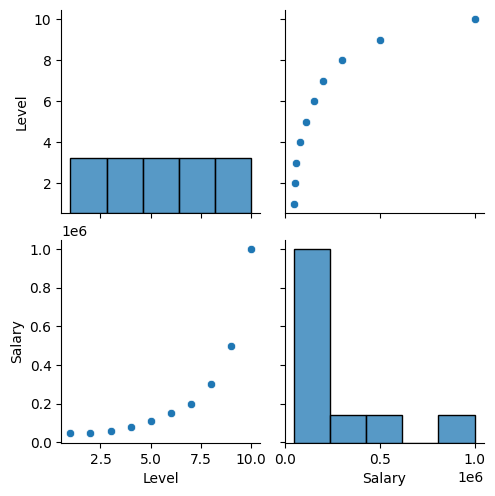

In [5]:
sns.pairplot(dataset)

In [6]:
#Görüldüğü üzere linear regresyon ile çözülemez.

In [7]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [10]:
#şimdi accuracy değerini ölçeceğiz.


In [11]:
print("Training Accuracy :",lin_reg.score(X_train,y_train))
print("Testing Accuracy :", lin_reg.score(X_test,y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575974


In [12]:
#Değer düşük olduğu için polinom regresyon ile çözmeye çalışacağız.<

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_Reg = PolynomialFeatures(degree= 4) #Polinom derecesi ne olacak, degree = ?
lin_reg_2 = LinearRegression()
X_poly = poly_Reg.fit_transform(X_train) 
lin_reg_2.fit(X_poly,y_train)
X_poly_test = poly_Reg.transform(X_test)



In [14]:
print("Training Accuracy :",lin_reg_2.score(X_poly,y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test,y_test))

Training Accuracy : 0.9995857211026754
Testing Accuracy : 0.9714666803840689


In [15]:
#Görüldüğü üzere polinom ile daha yüksek bir doğruluk elde ettik

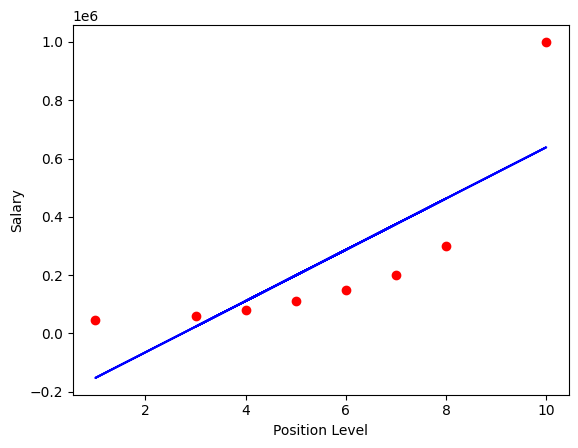

In [16]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lin_reg.predict(X_train),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

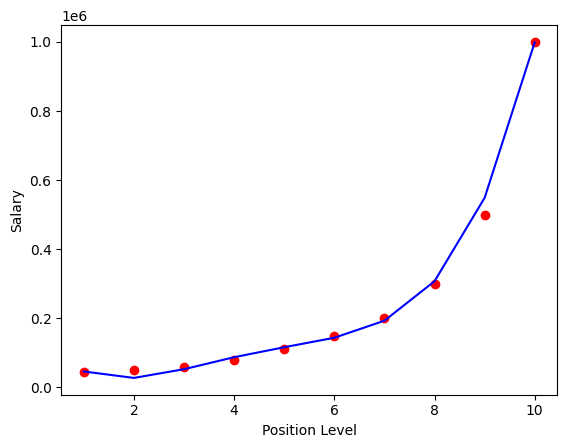

In [17]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_Reg.fit_transform(X)),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
